In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications import VGG16, ResNet50

import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['Modelo Treinado v1', 'treino_superior.csv']


In [2]:
df = pd.read_csv("../input/treino_superior.csv")

In [3]:
df = df[['image', ' Shoulder_Left_A', ' Shoulder_Left_X', ' Shoulder_Left_Y',
       ' Shoulder_Left_Z', ' Elbow_Left_A', ' Elbow_Left_X', ' Elbow_Left_Y',
       ' Elbow_Left_Z',' Shoulder_Right_A', ' Shoulder_Right_X',
       ' Shoulder_Right_Y', ' Shoulder_Right_Z', ' Elbow_Right_A',
       ' Elbow_Right_X', ' Elbow_Right_Y', ' Elbow_Right_Z']]

In [4]:
#função que recebe uma imagem em base 64 e rotrna array do numpy rgb
def getImageNp(imgB64):
    decoded_image = base64.b64decode(imgB64)
    img = Image.open(BytesIO(decoded_image))
    arr = np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)
    return arr

def getImageNp1D(imgB64):
    decoded_image = base64.b64decode(imgB64)
    img = Image.open(BytesIO(decoded_image))
    arr = np.array(img.getdata())
    arr.astype(int)
    return arr

In [5]:
#X é a coluna das fotos
X = df['image']
#y são as restantes. A "resposta"
y = df.drop(columns="image")


In [6]:
freq = 5
tam = 720

linhas = [x for x in range(tam) if (x+1)%freq==0]
print(linhas)
total = len(linhas)
total = X.shape[0]

Xtmp = np.zeros((total, 480, 640, 3)).astype(int)
for i in range(total):
    print("Carregando img ", i)
    im = getImageNp(X[i])
    #print(im.shape)
    Xtmp[i] = im
    

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299, 304, 309, 314, 319, 324, 329, 334, 339, 344, 349, 354, 359, 364, 369, 374, 379, 384, 389, 394, 399, 404, 409, 414, 419, 424, 429, 434, 439, 444, 449, 454, 459, 464, 469, 474, 479, 484, 489, 494, 499, 504, 509, 514, 519, 524, 529, 534, 539, 544, 549, 554, 559, 564, 569, 574, 579, 584, 589, 594, 599, 604, 609, 614, 619, 624, 629, 634, 639, 644, 649, 654, 659, 664, 669, 674, 679, 684, 689, 694, 699, 704, 709, 714, 719]
Carregando img  0
Carregando img  1
Carregando img  2
Carregando img  3
Carregando img  4
Carregando img  5
Carregando img  6
Carregando img  7
Carregando img  8
Carregando img  9
Carregando img  10
Carregando img  11
Carregando img  12
Carregando img  13
Carregando img  14
Carregando img  15
Carrega

In [7]:
Xtmp = Xtmp.astype('float32')/255

In [8]:
angleCols = [' Shoulder_Left_A', ' Elbow_Left_A', ' Shoulder_Right_A', ' Elbow_Right_A']
axisCols = [' Shoulder_Left_X', ' Shoulder_Left_Y', ' Shoulder_Left_Z', 
            ' Elbow_Left_X', ' Elbow_Left_Y', ' Elbow_Left_Z',
            ' Shoulder_Right_X', ' Shoulder_Right_Y', ' Shoulder_Right_Z',
            ' Elbow_Right_X', ' Elbow_Right_Y', ' Elbow_Right_Z']

In [9]:
y = df.drop(columns="image")

In [10]:
normY = y
#normalizando as colunas de angulo
for c in angleCols:
    print(c)
    maxA = y[c].max()
    print("Max Angle: ", maxA)
    normY[c] = y[c] / maxA
    
print("================")

#normalizando as colunas de eixo
for c in axisCols:
    print(c)
    maxAx = y[c].max() + 1
    print("Max axis: ", maxAx)
    normY[c] = (y[c] + 1) / maxAx

 Shoulder_Left_A
Max Angle:  81.9843
 Elbow_Left_A
Max Angle:  165.343
 Shoulder_Right_A
Max Angle:  107.4643
 Elbow_Right_A
Max Angle:  236.8331
 Shoulder_Left_X
Max axis:  1.3373358
 Shoulder_Left_Y
Max axis:  1.6367318000000002
 Shoulder_Left_Z
Max axis:  1.9902696
 Elbow_Left_X
Max axis:  1.3578928000000001
 Elbow_Left_Y
Max axis:  1.9921030000000002
 Elbow_Left_Z
Max axis:  1.9978283000000001
 Shoulder_Right_X
Max axis:  1.1465464
 Shoulder_Right_Y
Max axis:  1.9521279
 Shoulder_Right_Z
Max axis:  1.9985553999999999
 Elbow_Right_X
Max axis:  1.473579
 Elbow_Right_Y
Max axis:  1.9279229
 Elbow_Right_Z
Max axis:  1.9640244999999998


## Carregando o modelo

In [13]:
json_file = open('../input/Modelo Treinado v1/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("../input/Modelo Treinado v1/model.h5")

W0905 15:41:46.550408  5148 deprecation_wrapper.py:119] From C:\Users\nobre\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [12]:
print(os.listdir("../input/Modelo Treinado v1"))

['model.h5', 'model.json']


In [14]:
sgd = SGD(lr=0.0001)

In [15]:
loaded_model.compile(optimizer = sgd , loss = "mean_squared_error", metrics=["mean_squared_error"])

W0905 15:44:01.372390  5148 deprecation_wrapper.py:119] From C:\Users\nobre\Anaconda3\envs\keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Predicted:  [0.25280592 0.43069777 0.25733957 0.38074666 0.23787099 0.40294653
 0.48106065 0.28783107 0.1970463  0.24965733 0.3049995  0.23542549
 0.17039151 0.3371139  0.15995629 0.3077116 ]


C:\Users\nobre\Anaconda3\envs\keras\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


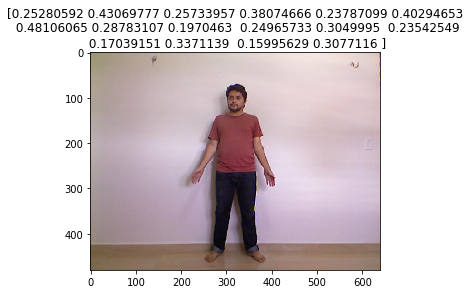

Predicted:  [0.25526315 0.43207267 0.25876507 0.3816485  0.23883691 0.40035656
 0.4818063  0.2908917  0.19338107 0.2505168  0.30561814 0.23364231
 0.1742072  0.33431426 0.15967299 0.30742767]


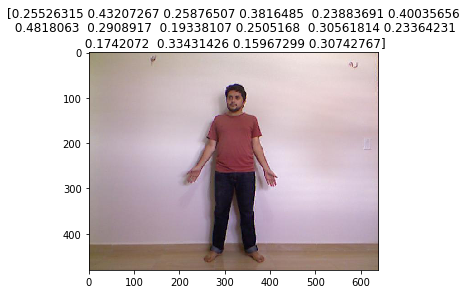

Predicted:  [0.25402686 0.43242386 0.26106483 0.38543886 0.24024133 0.39643168
 0.47848058 0.2868093  0.19406547 0.24862535 0.3061162  0.23027302
 0.17462364 0.3352333  0.16105562 0.30708653]


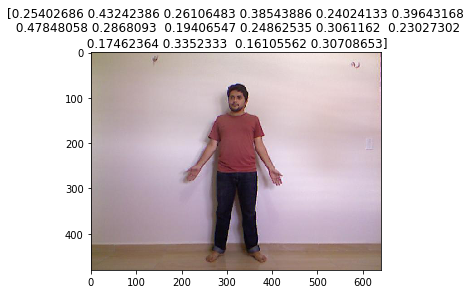

Predicted:  [0.25498858 0.42814466 0.2571548  0.3825803  0.23499967 0.3990607
 0.4728411  0.28904638 0.19141528 0.24734025 0.3091791  0.23358737
 0.17344338 0.33299053 0.15985975 0.30526432]


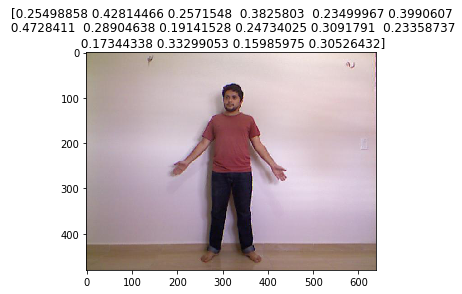

Predicted:  [0.24683286 0.4242758  0.26128453 0.38113    0.23999088 0.40205324
 0.4753688  0.29181245 0.19077706 0.24648859 0.3080598  0.23340699
 0.16767323 0.33989927 0.15976308 0.30600652]


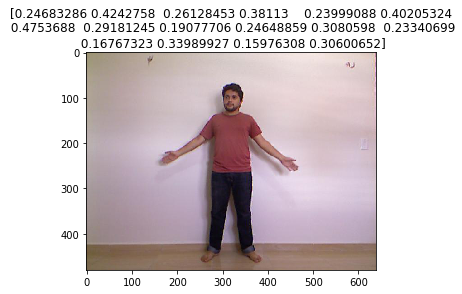

In [28]:
for i in range(1, 6):
    img = Xtmp[i]
    img_class = loaded_model.predict(Xtmp[:7])
    prediction = img_class[i]
    classname = img_class[i]
    print("Predicted: ",str(classname))
    
    #img = img.reshape((28,28))
    plt.imshow(img)
    plt.title(classname)
    plt.show()

In [26]:
Xtmp[:6].shape

(6, 480, 640, 3)